In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
cfar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test) = cfar100.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=24)


In [28]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(100, activation='softmax'),
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model_output = model.fit(X_train, Y_train, epochs=9 )
model.evaluate(X_test, Y_test)

Epoch 1/9
1407/1407 [==============================] - 39s 28ms/step - loss: 1.8005 - accuracy: 0.5104
Epoch 2/9
1407/1407 [==============================] - 38s 27ms/step - loss: 1.7530 - accuracy: 0.5192
Epoch 3/9
1407/1407 [==============================] - 38s 27ms/step - loss: 1.7108 - accuracy: 0.5284
Epoch 4/9
1407/1407 [==============================] - 38s 27ms/step - loss: 1.6632 - accuracy: 0.5405
Epoch 5/9
1407/1407 [==============================] - 39s 27ms/step - loss: 1.6149 - accuracy: 0.5526
Epoch 6/9
1407/1407 [==============================] - 39s 27ms/step - loss: 1.5818 - accuracy: 0.5601
Epoch 7/9
1407/1407 [==============================] - 39s 28ms/step - loss: 1.5302 - accuracy: 0.5727
Epoch 8/9
1407/1407 [==============================] - 35s 25ms/step - loss: 1.4981 - accuracy: 0.5766
Epoch 9/9
313/313 [==============================] - 2s 7ms/step - loss: 3.1550 - accuracy: 0.3318


[3.1550276279449463, 0.33180001378059387]

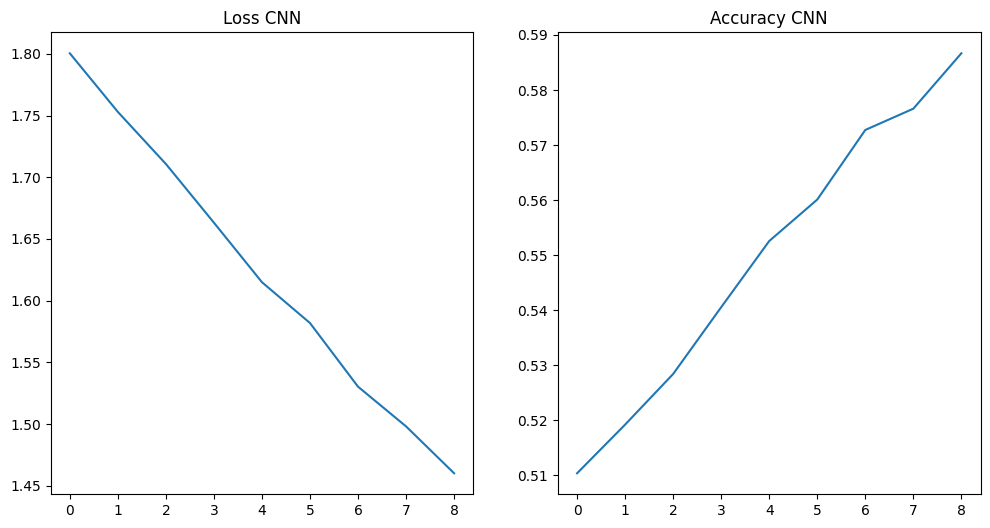

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()